## Implementation of Gradient Descent algorithm with Ridge Regression for shrinkage the coefficient

In [1]:
import os
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
print(os.listdir('datasets'))

['glass.csv', 'dataset_4.txt', 'dataset_3.txt', 'dataset_2.txt', 'dataset_1.txt', 'ign.csv', 'spam.csv']


In [11]:
data = pd.read_csv('datasets/dataset_4.txt')
df_x = data.iloc[:, 50:65]
df_y = data.iloc[:,-1]

num_predictors = np.shape(df_x)[1]
data_expanded = pd.DataFrame({})

# Loop
for column in df_x.columns:
    if df_x[column].dtype == np.dtype('object'):
        encoded_col = pd.get_dummies(df_x[column])
        data_expanded = pd.concat([data_expanded, encoded_col], axis=1) 
    else:
        data_expanded = pd.concat([data_expanded, df_x[column]], axis=1) 
df_x = data_expanded.copy()
data_expanded.head()

print(df_x.shape)

(2517, 15)


/Users/oziomek/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [193]:
data = pd.read_csv('datasets/dataset_2.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
horsepower           205 non-null float64
highway-mpg          205 non-null float64
symboling            205 non-null float64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null float64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               20

In [194]:
data['body-style'] = data['body-style'].map({'wagon': 1, 'hardtop': 2, 'sedan': 3, 'hatchback': 4, 'convertible': 5})
make_list = data['body-style'].unique()
print(make_list)

[1 2 3 4 5]


In [195]:
y = data['body-style']
X = data.drop('body-style', axis=1)
print(X.shape, y.shape)
categorical_bolean = (X.dtypes == "object").values
X_numeric = X.loc[:, ~categorical_bolean]
X_categorical = X.loc[:, categorical_bolean]
X_dummies = pd.get_dummies(X_categorical)
X_numeric = X_numeric / X_numeric.std(axis=0)
X = pd.concat([X_numeric, X_dummies], axis=1)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2018)

(205, 25) (205,)
(205, 60)


In [196]:
x = data_expanded.iloc[:, 0:-1].values
y = df_y.values.reshape(len(df_y.values), 1)

# Split into train and test set
n = x.shape[0]
n_train = int(np.round(n*0.75))
indices = np.random.permutation(range(n))
train_indices = indices[0:n_train]
test_indices = indices[n_train:]

# The first 25% are in the training set, the rest is in the test set (assuming the data has been ran. shuffeled) 
X_train = x[train_indices,:]
y_train = y[train_indices]
X_test = x[test_indices,:]
y_test = y[test_indices]

NameError: name 'data_expanded' is not defined

In [384]:
class GradientDescent:
    def __init__(self):
        pass
    
    def fit(self, X, y, learning_rate=0.0001, iters = 1000):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iters = iters
        self.m, self.b = self.gradient()
        
    def gradient(self):
        N = float(len(self.y))
        self.m, self.b = 0, 0
        b_grad, m_grad = 0, 0
        for i in range(self.iters):
#             y_temp = np.add(np.multiply(m,self.X), b)
# #             y_diff = np.subtract(self.y, y_temp)
# #             print('Y_DIFF', y_diff)
#             MSE = sum([error**2 for error in (self.y - y_temp)]) / N
#             print('MSE', MSE)
#             m_gradient = -(2/N) * sum(self.X * (self.y - y_temp))
#             b_gradient = -(2/N) * sum(self.y - y_temp)
#             m -= (self.learning_rate * m_gradient)
#             b -= (self.learning_rate * b_gradient)
            for j in range(len(self.y)):
                x, y = self.X[j], self.y[j]
                b_grad += -(2/N) * (y - ((self.m * x) + self.b))
                m_grad += -(2/N) * x * (y - ((self.m * x) + self.b))
            m = - (self.learning_rate * m_grad)
            b = - (self.learning_rate * b_grad)
        self.m, self.b = m, b
        return self.m, self.b # , MSE

    def score(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        y = self.m*self.X_test + self.b
        error = 0
        for i in range(len(self.y_test)):
            x = self.X_test[i]
            y = self.y_test[i]
            error += (y - (self.m * x + self.b)) ** 2
        return error / float(len(error))

In [385]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.model = self.ridge()
        
    def ridge(self):
        n, p = np.shape(self.X)
        self.X = np.concatenate((self.X, np.sqrt(10.0**self.alpha) * np.identity(p)), axis=0)
        self.y = np.concatenate((self.y, np.zeros(p)), axis=0)
        self.model = LinearRegression() # GradientDescent()
        self.model.fit(self.X, self.y)
        return self.model
        
    def score(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        n, p = np.shape(self.X_test)
        self.X_test = np.concatenate((self.X_test, np.sqrt(10.0**self.alpha) * np.identity(p)), axis=0)
        self.y_test = np.concatenate((y_test, np.zeros(p)), axis=0)
        return self.model.score(self.X_test, self.y_test)

In [386]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [387]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
train_rsquared = ridge_reg.score(X_train, y_train)
test_rsquared = ridge_reg.score(X_test, y_test)

In [388]:
print('Ridge regression R^2 score: training ', train_rsquared)
print('Ridge regression R^2 score: test ', test_rsquared)

Ridge regression R^2 score: training  0.707981561395
Ridge regression R^2 score: test  0.232188977637


In [389]:
ridge_reg_impl = RidgeRegression(alpha=1.0)
ridge_reg_impl.fit(X_train, y_train)
train_rsquared_impl = ridge_reg_impl.score(X_train, y_train)
test_rsquared_impl = ridge_reg_impl.score(X_test, y_test)

In [390]:
print('Ridge regression R^2 score: training ', train_rsquared_impl)
print('Ridge regression R^2 score: test ', test_rsquared_impl)

Ridge regression R^2 score: training  0.869854167191
Ridge regression R^2 score: test  0.873746778566


In [444]:
lambdas = np.linspace(-3, 3, 100)
r2_train, r2_test = np.zeros(len(lambdas)), np.zeros(len(lambdas)) 
r2_train_impl, r2_test_impl = np.zeros(len(lambdas)), np.zeros(len(lambdas))

In [445]:
for i in range(len(lambdas)):
    model = Ridge(alpha=i)
    model_impl = RidgeRegression(alpha=i)
    model.fit(X_train, y_train)
    model_impl.fit(X_train, y_train)
    
    r2_train[i] = model.score(X_train, y_train)
    r2_test[i] = model.score(X_test, y_test)
    r2_train_impl[i] = model_impl.score(X_train, y_train)
    r2_test_impl[i] = model_impl.score(X_test, y_test)
    print('R2_train: ', r2_train[i], 'R2_test: ', r2_test[i], 'R2_train_impl: ', r2_train_impl[i], 'R2_train_impl: ', r2_test_impl[i])

R2_train:  0.72117230598 R2_test:  -4.78353872631e+26 R2_train_impl:  0.909592654643 R2_train_impl:  0.882702901249
R2_train:  0.707981561395 R2_test:  0.232188977637 R2_train_impl:  0.869854167191 R2_train_impl:  0.873746778566
R2_train:  0.683238916644 R2_test:  0.26391893377 R2_train_impl:  0.81646851514 R2_train_impl:  0.854702884798
R2_train:  0.664059903884 R2_test:  0.278793783663 R2_train_impl:  0.749686820999 R2_train_impl:  0.835332964426
R2_train:  0.648170461789 R2_test:  0.287049606248 R2_train_impl:  0.681393886052 R2_train_impl:  0.821196736614
R2_train:  0.634589004893 R2_test:  0.291999262588 R2_train_impl:  0.746628815059 R2_train_impl:  0.884517720951
R2_train:  0.622753673401 R2_test:  0.295092363108 R2_train_impl:  0.736624699532 R2_train_impl:  0.88005891658
R2_train:  0.612294425468 R2_test:  0.297062228186 R2_train_impl:  0.734475156734 R2_train_impl:  0.87896505759
R2_train:  0.602948490792 R2_test:  0.298315014664 R2_train_impl:  0.733879053374 R2_train_impl: 

R2_train:  0.4195248483 R2_test:  0.264642209154 R2_train_impl:  0.733615786862 R2_train_impl:  0.878492760265
R2_train:  0.418741302702 R2_test:  0.264278340213 R2_train_impl:  0.733615786862 R2_train_impl:  0.878492760265
R2_train:  0.417965342022 R2_test:  0.263916254736 R2_train_impl:  0.733615786862 R2_train_impl:  0.878492760265
R2_train:  0.417196805303 R2_test:  0.263555937039 R2_train_impl:  0.733615786862 R2_train_impl:  0.878492760265
R2_train:  0.41643553669 R2_test:  0.263197371598 R2_train_impl:  0.733615786862 R2_train_impl:  0.878492760265


In [448]:
# just temporary for presenting data in plot
r2_test[0] = math.sqrt(r2_test[2] - r2_test[1])

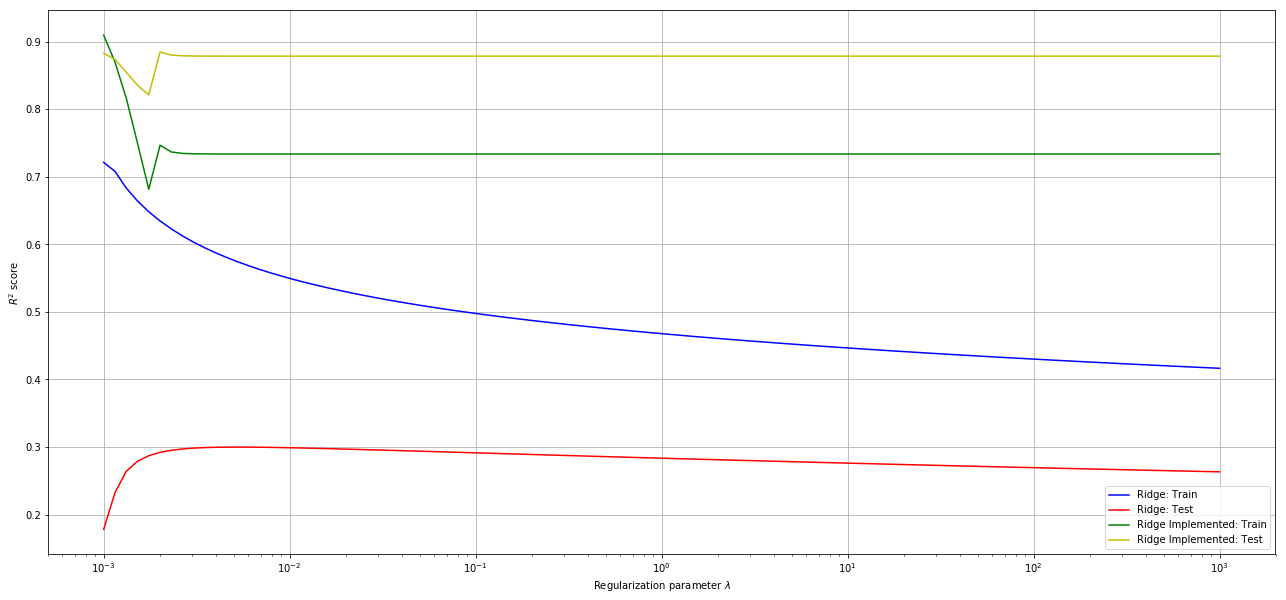

In [449]:
fig, ax = plt.subplots(1, 1, figsize=(22, 10))
ax.semilogx(10.0**lambdas, (r2_train), c='b', label='Ridge: Train')
ax.semilogx(10.0**lambdas, (r2_test), c='r', label='Ridge: Test')
ax.semilogx(10.0**lambdas, (r2_train_impl), c='g', label='Ridge Implemented: Train')
ax.semilogx(10.0**lambdas, (r2_test_impl), c='y', label='Ridge Implemented: Test')

ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')
ax.legend(loc = 'best')
plt.grid()